## กราฟหน้า 6 ลบเส้นเชื่อมเเนวนอกออกเปลั้ยนเป็น scatter plot เเทน x:ก่อน, y:หลัง

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import plot, show, title, xlabel, ylabel
from pylab import legend
from pylab import axis

In [ ]:
0.31,0.57,0.67,0.51,0.91,0.75,0.61,0.87,0.85,0.93,0.53
0.75,0.51,0.4,0.75,0.79,0.55,0.79,0.88,0.79,0.89,0.86

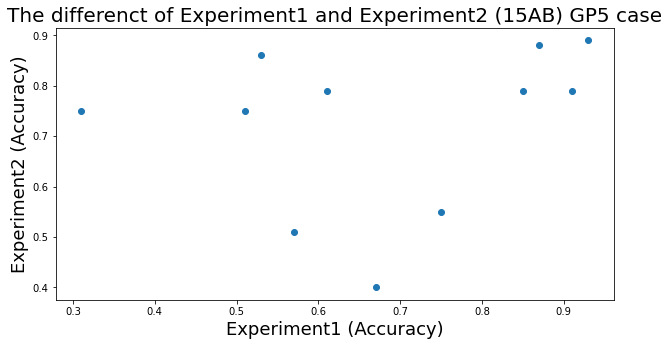

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))

XBefore = [0.31,0.57,0.67,0.51,0.91,0.75,0.61,0.87,0.85,0.93,0.53]
YAfter = [0.75,0.51,0.4,0.75,0.79,0.55,0.79,0.88,0.79,0.89,0.86]
plt.scatter(XBefore, YAfter)

plt.title('The differenct of Experiment1 and Experiment2 (15AB) GP5 case',fontsize=20) 
plt.xlabel('Experiment1 (Accuracy)',fontsize=18)
plt.ylabel('Experiment2 (Accuracy)',fontsize=18)
show()

## confusion matrix

### 1.Normalization

In [25]:
import pandas as pd
df = pd.read_csv( '/home/USAI001/codes/USAI/Experiment2_AI.csv')

#### -  Assist tool

In [26]:
AssistGP5 =['B10_Pred2_ass','B11_Pred1_ass','B12_Pred1_ass','U10_Pred2_ass','U10_Pred','U20_Pred_ass','U21_Pred2_ass','U30_Pred2_ass','U31_Pred_ass','U40_Pred_ass','U41_Pred2_ass']
# AssistGP4 =['B10_Pred2_ass','B11_Pred1_ass','B12_Pred1_ass','U10_Pred2_ass','U20_Pred_ass','U21_Pred2_ass','U30_Pred2_ass','U31_Pred_ass','U40_Pred_ass','U41_Pred2_ass']
# AssistGP3 =['B10_Pred2_ass','B11_Pred1_ass','B12_Pred1_ass','U20_Pred_ass','U21_Pred2_ass','U30_Pred2_ass','U31_Pred_ass','U40_Pred_ass','U41_Pred2_ass']

In [29]:
aa = list()
probmore=df
a = [0.0,0.1,0.2,0.3,0.4,0.50,0.60,0.70,0.80,0.90,1.0]
per =AssistGP5
for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report,confusion_matrix

    act= probmore['Sub_class_New'].array
    pred = probmore[j].array
    a = confusion_matrix(act, pred)
    #print(tn, fp, fn, tp)
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'Person':j,'Con':a,'acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})

/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

1650


Text(0.5, 21.5, 'Predicted label')

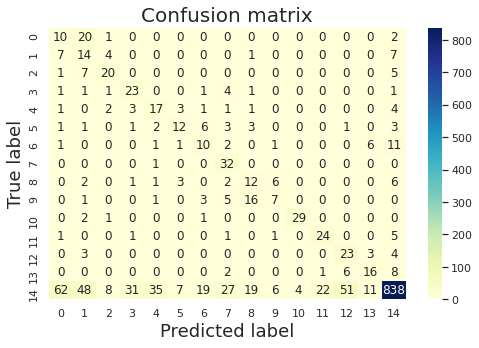

In [30]:
df1 = pd.DataFrame(aa)
cmAss = df1.Con[0]+df1.Con[1]+df1.Con[2]+df1.Con[3]+df1.Con[4]+df1.Con[5]+df1.Con[6]+df1.Con[7]+df1.Con[8]+df1.Con[9]+df1.Con[10]
print(sum(cmAss.ravel()))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(cmAss, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [31]:
print(cmAss)

[[ 10  20   1   0   0   0   0   0   0   0   0   0   0   0   2]
 [  7  14   4   0   0   0   0   0   1   0   0   0   0   0   7]
 [  1   7  20   0   0   0   0   0   0   0   0   0   0   0   5]
 [  1   1   1  23   0   0   1   4   1   0   0   0   0   0   1]
 [  1   0   2   3  17   3   1   1   1   0   0   0   0   0   4]
 [  1   1   0   1   2  12   6   3   3   0   0   0   1   0   3]
 [  1   0   0   0   1   1  10   2   0   1   0   0   0   6  11]
 [  0   0   0   0   1   0   0  32   0   0   0   0   0   0   0]
 [  0   2   0   1   1   3   0   2  12   6   0   0   0   0   6]
 [  0   1   0   0   1   0   3   5  16   7   0   0   0   0   0]
 [  0   2   1   0   0   0   1   0   0   0  29   0   0   0   0]
 [  1   0   0   1   0   0   0   1   0   1   0  24   0   0   5]
 [  0   3   0   0   0   0   0   0   0   0   0   0  23   3   4]
 [  0   0   0   0   0   0   0   2   0   0   0   1   6  16   8]
 [ 62  48   8  31  35   7  19  27  19   6   4  22  51  11 838]]


In [32]:
norlist_ = []
for k in range(len(cmAss)):
    norlist = []
    for i in range(len(cmAss[k])):
        #normalized = (cmAss[0][i] - max(cmAss[0]))/(max(cmAss[0]) - min(cmAss[0]))
        normalized = cmAss[k][i] /sum(cmAss[k])
        #norlist.append(float('%.2f' % (normalized)))
        norlist.append(normalized)
    norlist_.append(norlist)
my_array = np.array(norlist_)

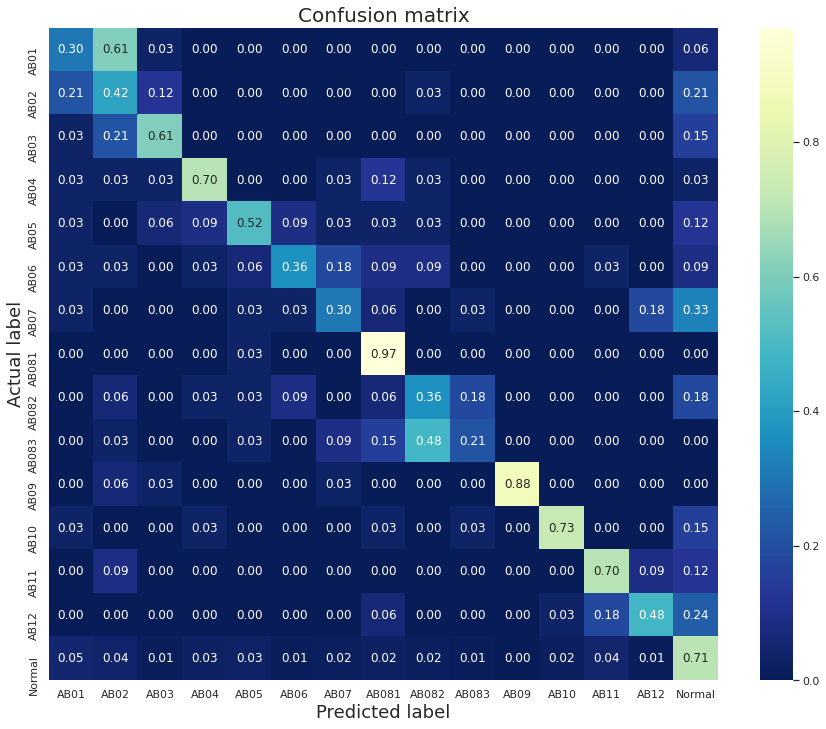

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

target_names = ['AB01', 'AB02', 'AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal']
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(my_array, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names, cmap="YlGnBu_r")
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('Actual label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)
plt.show(block=False)

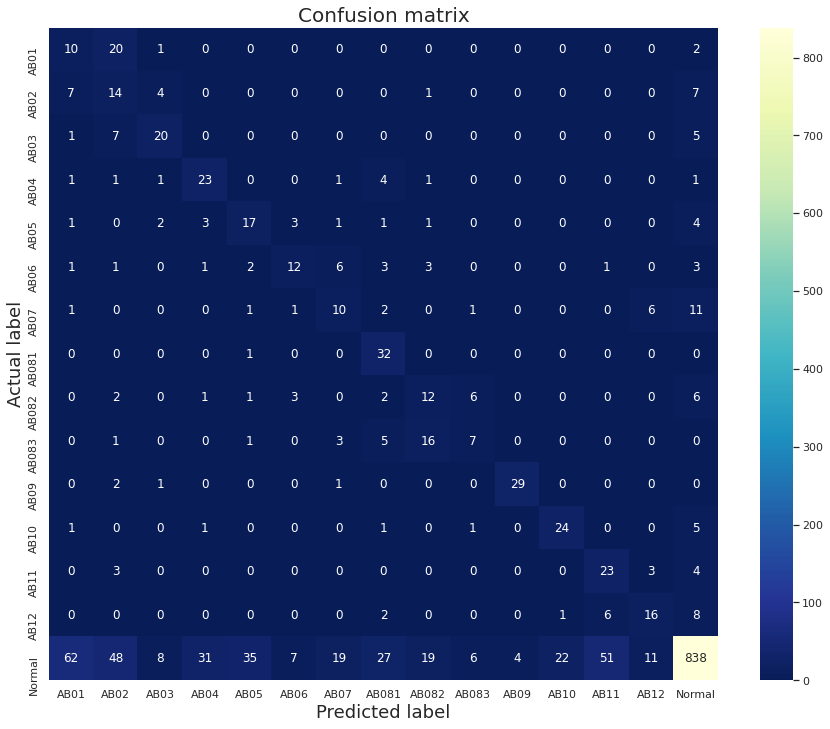

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

target_names = ['AB01', 'AB02', 'AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal']
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(cmAss, fmt='d',annot=True, xticklabels=target_names, yticklabels=target_names, cmap="YlGnBu_r")
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('Actual label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)
plt.show()

#### -  Non - Assist tool

In [39]:
aa = list()
probmore=df
a = [0.0,0.1,0.2,0.3,0.4,0.50,0.60,0.70,0.80,0.90,1.0]
per = ['B10_Pred1','B11_Pred2','B12_Pred2','U10_Pred','U11_Pred2','U20_Pred2','U21_Pred','U30_Pred','U31_Pred2','U40_Pred2','U41_Pred']
for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report,confusion_matrix
#     act = probmore['Sub_class_New'].array
#     pred = probmore[j].array
    act= probmore['Sub_class_New'].array
    pred = probmore[j].array
    a = confusion_matrix(act, pred)
#     print(tn, fp, fn, tp)
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'Person':j,'Con':a,'acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})

/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

1650


Text(0.5, 21.5, 'Predicted label')

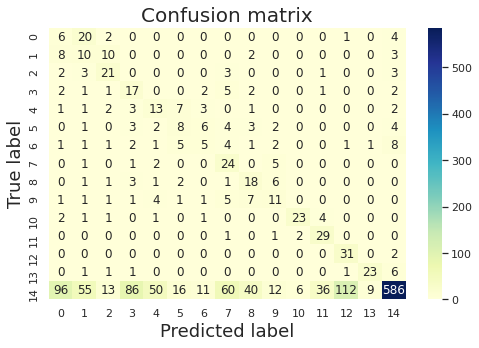

In [40]:
df1 = pd.DataFrame(aa)
cm = df1.Con[0]+df1.Con[1]+df1.Con[2]+df1.Con[3]+df1.Con[4]+df1.Con[5]+df1.Con[6]+df1.Con[7]+df1.Con[8]+df1.Con[9]+df1.Con[10]
print(sum(cm.ravel()))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [41]:
norlist1_ = []
for k in range(len(cm)):
    norlist1 = []
    for i in range(len(cm[k])):
        #normalized = (cmAss[0][i] - max(cmAss[0]))/(max(cmAss[0]) - min(cmAss[0]))
        normalized = cm[k][i] /sum(cm[k])
#         norlist.append(float('%.2f' % (normalized)))
        norlist1.append(normalized)
    norlist1_.append(norlist1)
my_array1 = np.array(norlist1_)

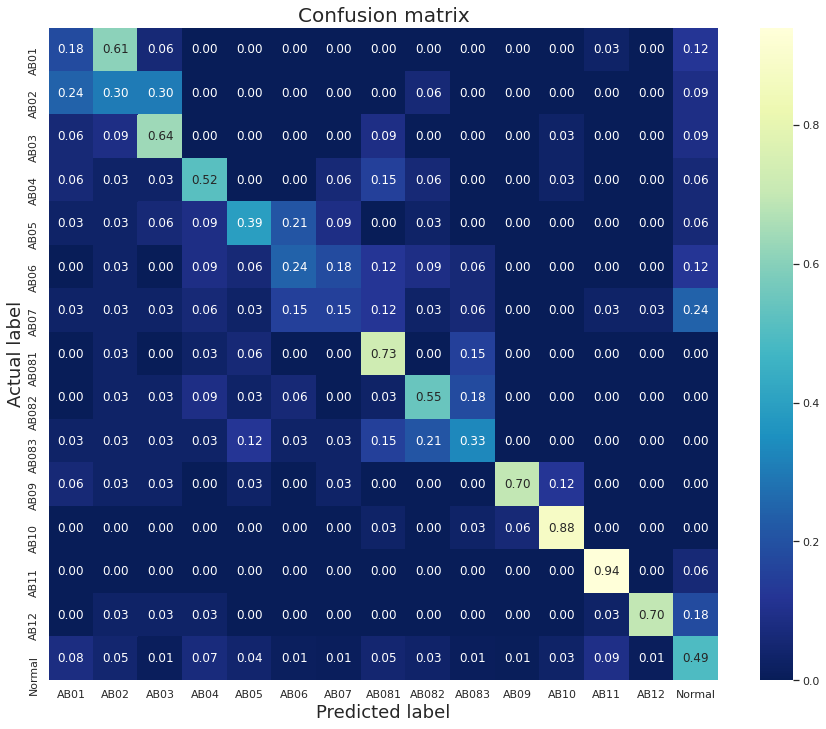

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

target_names = ['AB01', 'AB02', 'AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal']
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(my_array1, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names, cmap="YlGnBu_r")
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('Actual label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)
plt.show(block=False)

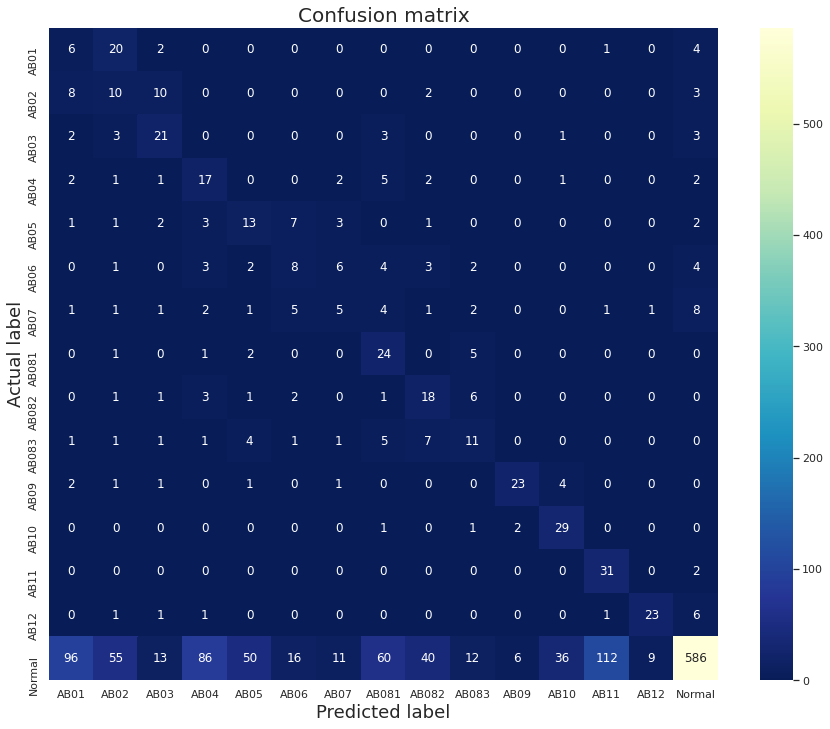

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

target_names = ['AB01', 'AB02', 'AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal']
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names, cmap="YlGnBu_r")
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('Actual label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)
plt.show(block=False)

## | Non-Assist tool - Assist tool |

In [118]:
cmm = my_array1-my_array

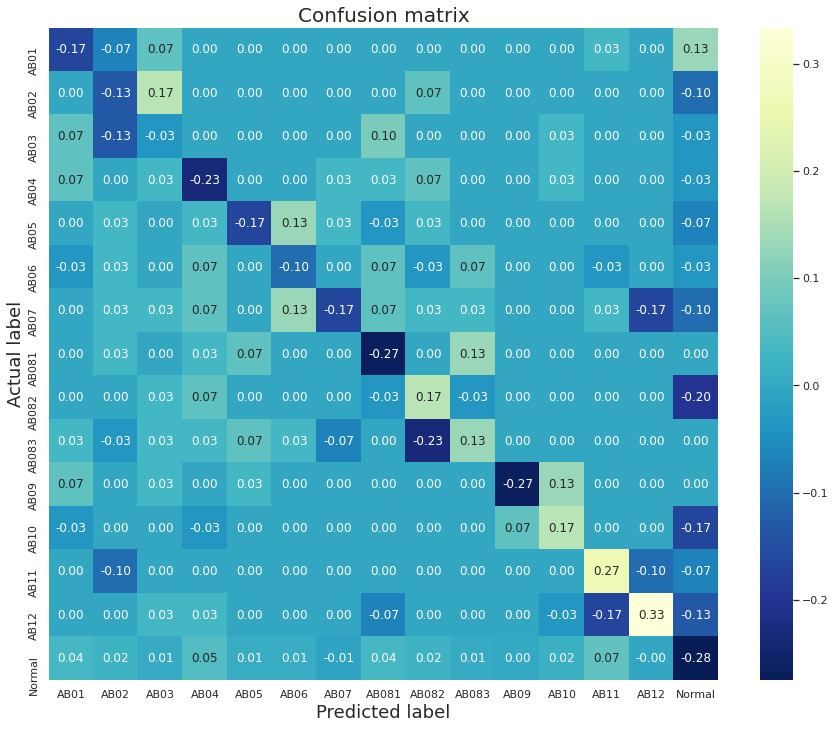

In [120]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
target_names = ['AB01', 'AB02', 'AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal']
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(cmm, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names, cmap="YlGnBu_r") #YlGnBu_r, rocket
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('Actual label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)
plt.show(block=False)

In [56]:
cmmm = cmAss-cm

In [59]:
cmAss

array([[ 10,  20,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   2],
       [  7,  14,   4,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,
          0,   7],
       [  1,   7,  20,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   5],
       [  1,   1,   1,  23,   0,   0,   1,   4,   1,   0,   0,   0,   0,
          0,   1],
       [  1,   0,   2,   3,  17,   3,   1,   1,   1,   0,   0,   0,   0,
          0,   4],
       [  1,   1,   0,   1,   2,  12,   6,   3,   3,   0,   0,   0,   1,
          0,   3],
       [  1,   0,   0,   0,   1,   1,  10,   2,   0,   1,   0,   0,   0,
          6,  11],
       [  0,   0,   0,   0,   1,   0,   0,  32,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   2,   0,   1,   1,   3,   0,   2,  12,   6,   0,   0,   0,
          0,   6],
       [  0,   1,   0,   0,   1,   0,   3,   5,  16,   7,   0,   0,   0,
          0,   0],
       [  0,   2,   1,   0,   0,   0,   1,   0,   0,   0,  29,   0,   0,
       

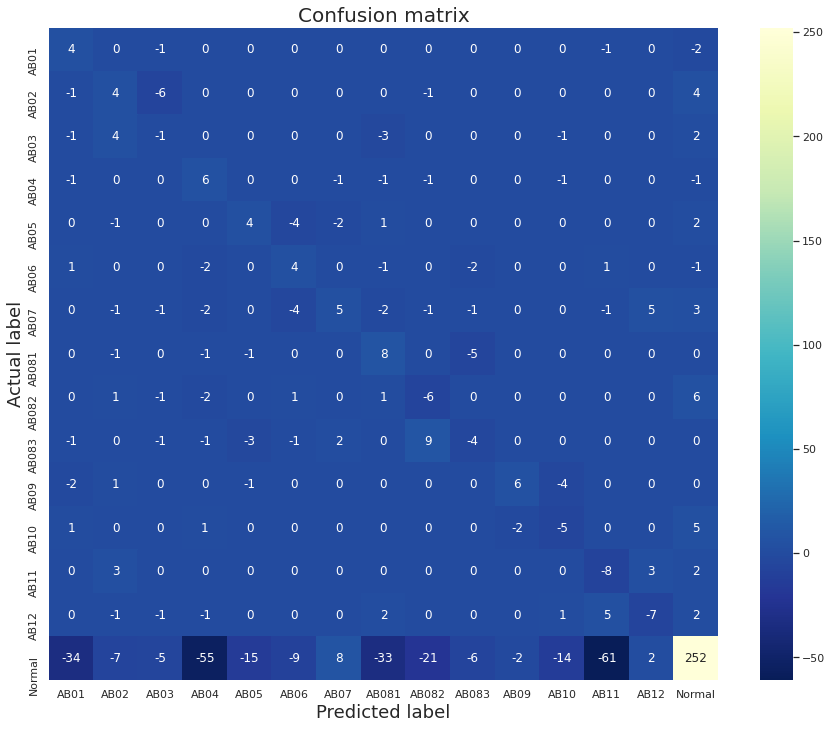

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

target_names = ['AB01', 'AB02', 'AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal']
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(cmmm,  fmt="d", annot=True, xticklabels=target_names, yticklabels=target_names, cmap="YlGnBu_r") #YlGnBu_r, rocket
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('Actual label',fontsize=18) 
ax.set_xlabel('Predicted label',fontsize=18)
plt.show(block=False)

In [58]:
cmmm

array([[  4,   0,  -1,   0,   0,   0,   0,   0,   0,   0,   0,   0,  -1,
          0,  -2],
       [ -1,   4,  -6,   0,   0,   0,   0,   0,  -1,   0,   0,   0,   0,
          0,   4],
       [ -1,   4,  -1,   0,   0,   0,   0,  -3,   0,   0,   0,  -1,   0,
          0,   2],
       [ -1,   0,   0,   6,   0,   0,  -1,  -1,  -1,   0,   0,  -1,   0,
          0,  -1],
       [  0,  -1,   0,   0,   4,  -4,  -2,   1,   0,   0,   0,   0,   0,
          0,   2],
       [  1,   0,   0,  -2,   0,   4,   0,  -1,   0,  -2,   0,   0,   1,
          0,  -1],
       [  0,  -1,  -1,  -2,   0,  -4,   5,  -2,  -1,  -1,   0,   0,  -1,
          5,   3],
       [  0,  -1,   0,  -1,  -1,   0,   0,   8,   0,  -5,   0,   0,   0,
          0,   0],
       [  0,   1,  -1,  -2,   0,   1,   0,   1,  -6,   0,   0,   0,   0,
          0,   6],
       [ -1,   0,  -1,  -1,  -3,  -1,   2,   0,   9,  -4,   0,   0,   0,
          0,   0],
       [ -2,   1,   0,   0,  -1,   0,   0,   0,   0,   0,   6,  -4,   0,
       

In [55]:
norlist2_ = []
for k in range(len(cmmm)):
    norlist2 = []
    for i in range(len(cmmm[k])):
        #normalized = (cmAss[0][i] - max(cmAss[0]))/(max(cmAss[0]) - min(cmAss[0]))
        normalized = cmmm[k][i] /sum(cmmm[k])
        print(sum(cmmm[k]))
#         norlist.append(float('%.2f' % (normalized)))
        norlist2.append(normalized)
    norlist2_.append(norlist2)
my_array2 = np.array(norlist2_)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


/home/USAI001/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/USAI001/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


In [52]:
my_array2

array([[ inf,  nan, -inf,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan, -inf,  nan, -inf],
       [-inf,  inf, -inf,  nan,  nan,  nan,  nan,  nan, -inf,  nan,  nan,
         nan,  nan,  nan,  inf],
       [-inf,  inf, -inf,  nan,  nan,  nan,  nan, -inf,  nan,  nan,  nan,
        -inf,  nan,  nan,  inf],
       [-inf,  nan,  nan,  inf,  nan,  nan, -inf, -inf, -inf,  nan,  nan,
        -inf,  nan,  nan, -inf],
       [ nan, -inf,  nan,  nan,  inf, -inf, -inf,  inf,  nan,  nan,  nan,
         nan,  nan,  nan,  inf],
       [ inf,  nan,  nan, -inf,  nan,  inf,  nan, -inf,  nan, -inf,  nan,
         nan,  inf,  nan, -inf],
       [ nan, -inf, -inf, -inf,  nan, -inf,  inf, -inf, -inf, -inf,  nan,
         nan, -inf,  inf,  inf],
       [ nan, -inf,  nan, -inf, -inf,  nan,  nan,  inf,  nan, -inf,  nan,
         nan,  nan,  nan,  nan],
       [ nan,  inf, -inf, -inf,  nan,  inf,  nan,  inf, -inf,  nan,  nan,
         nan,  nan,  nan,  inf],
       [-inf,  nan, -inf, -inf, -inf,

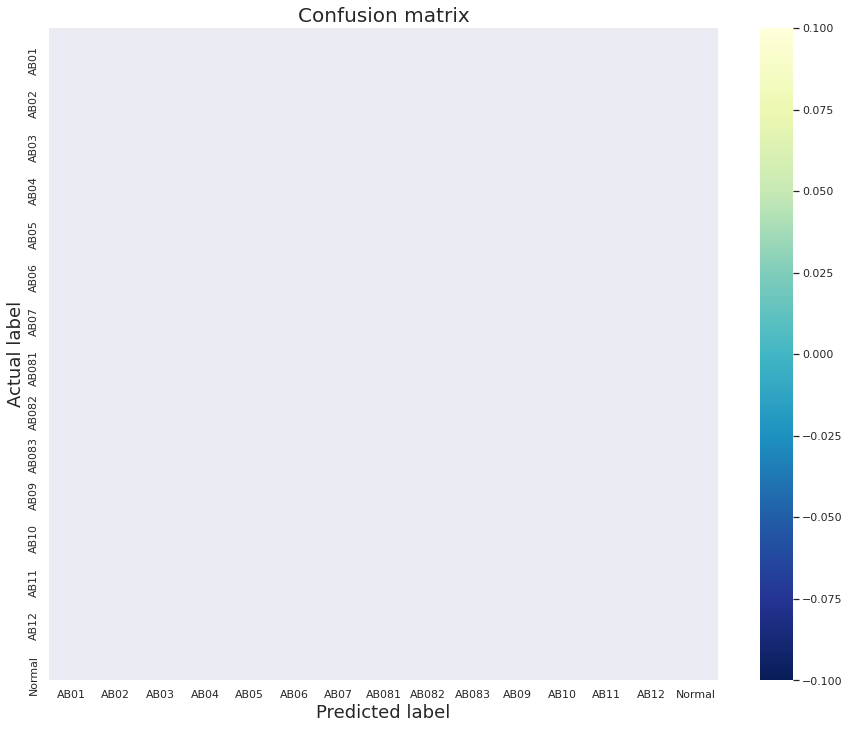

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

target_names = ['AB01', 'AB02', 'AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal']
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(my_array2, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names, cmap="YlGnBu_r")
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('Actual label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)
plt.show(block=False)

## ทำกราฟแยกตามกลุ่มที่เป็นช่วง

In [12]:
import pandas as pd
df = pd.read_csv( '/home/USAI001/codes/USAI/Experiment2_AI.csv')
df.head()

,Unnamed: 0,num,FileName,sub_class,views,Path Crop,originalImage,tagName1,tagName2,Class,...,U31_Pred2,U40_Pred2,U20_Pred2,U21_Pred2_ass,B10_Pred1,B11_Pred1_ass,B12_Pred1_ass,B10_Pred2_ass,B11_Pred2,B12_Pred2
0,0,1,AB01 P1 C100.JPG,AB01,FP-A,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,...,AB03,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01
1,1,2,AB01 P4-2 C050.JPG,AB01,FP-B,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,...,AB02,AB02,AB01,AB02,AB01,AB01,AB02,AB02,AB01,Normal
2,2,3,AB01 P5-2 C004.JPG,AB01,FP-C,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,...,AB02,AB02,AB01,AB01,AB11,AB02,AB01,AB01,AB02,Normal
3,3,4,AB02 P1 C001.JPG,AB02,FP-A,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,...,AB02,AB02,AB03,AB02,AB082,AB01,AB02,AB02,AB01,AB01
4,4,5,AB02 P3-1 C001.JPG,AB02,FP-B,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,...,AB02,AB01,AB02,AB01,AB01,AB01,AB01,AB01,AB01,Normal


In [13]:
# AssistGP5 =['B10_Pred2_ass','B11_Pred1_ass','B12_Pred1_ass','U10_Pred2_ass','U10_Pred','U20_Pred_ass','U21_Pred2_ass','U30_Pred2_ass','U31_Pred_ass','U40_Pred_ass','U41_Pred2_ass']
AssistGP4 =['B10_Pred2_ass','B11_Pred1_ass','B12_Pred1_ass','U10_Pred2_ass','U20_Pred_ass','U21_Pred2_ass','U30_Pred2_ass','U31_Pred_ass','U40_Pred_ass','U41_Pred2_ass']

In [14]:
print('0<=x<0.2:',len(df[(df['Prob'] >= 0) & (df['Prob'] < 0.2)]))
# print('0.1<=x<0.2:',len(df[(df['Prob'] >= 0.1) & (df['Prob'] < 0.2)]))
print('0.2<=x<0.3:',len(df[(df['Prob'] >= 0.2) & (df['Prob'] < 0.3)]))
print('0.3<=x<0.4:',len(df[(df['Prob'] >= 0.3) & (df['Prob'] < 0.4)]))
print('0.4<=x<0.5:',len(df[(df['Prob'] >= 0.4) & (df['Prob'] < 0.5)]))
print('0.5<=x<0.6:',len(df[(df['Prob'] >= 0.5) & (df['Prob'] < 0.6)]))
print('0.6<=x<0.7:',len(df[(df['Prob'] >= 0.6) & (df['Prob'] < 0.7)]))
print('0.7<=x<0.8:',len(df[(df['Prob'] >= 0.7) & (df['Prob'] < 0.8)]))
print('0.8<=x<0.9:',len(df[(df['Prob'] >= 0.8) & (df['Prob'] < 0.9)]))
print('0.9<=x=1:',len(df[(df['Prob'] >= 0.9) & (df['Prob'] < 1)]))

0<=x<0.2: 3
0.2<=x<0.3: 10
0.3<=x<0.4: 11
0.4<=x<0.5: 9
0.5<=x<0.6: 9
0.6<=x<0.7: 6
0.7<=x<0.8: 9
0.8<=x<0.9: 20
0.9<=x=1: 46


In [15]:
dff=df
a = [0.0,0.2,0.3,0.4,0.50,0.60,0.70,0.80,0.90,1.0]
per =AssistGP4
aa = list()
for j in per:
    print('\n',j)
    for i in range(len(a)-1):
        #probmore=dff[dff['Prob']>=i]
        probmore = df[(df['Prob'] >= a[i]) & (df['Prob'] < a[i+1])]
        import numpy as np
        from sklearn.metrics import classification_report,confusion_matrix
        act = probmore['category'].array
        pred = probmore[j].array
        cmat = confusion_matrix(act, pred)
        acc = (100.*np.trace(cmat))/(np.sum(cmat))
        #print(acc)
        Recall = classification_report(act, pred).split()[-9]
        Prec = classification_report(act, pred).split()[-10] 
        correct =len(probmore[probmore['sub_class']==probmore[j]])
        wrong = len(probmore[probmore['sub_class']!=probmore[j]])
        aa.append({'per':j,'prob':a[i],'acc':acc,'Prec':Prec,'Recall':Recall,'correct':correct,'wrong':wrong})
        print(i,'classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))
        print('AI ทำนายถูก: ',len(probmore[probmore['sub_class']==probmore[j]]))
        print('AI ทำนายผิด: ',len(probmore[probmore['sub_class']!=probmore[j]]))
df1 = pd.DataFrame(aa)


 B10_Pred2_ass
0 classifier accuracy = 33.333333333333336%
AI ทำนายถูก:  0
AI ทำนายผิด:  3
1 classifier accuracy = 40.0%
AI ทำนายถูก:  5
AI ทำนายผิด:  5
2 classifier accuracy = 63.63636363636363%
AI ทำนายถูก:  5
AI ทำนายผิด:  6
3 classifier accuracy = 55.55555555555556%
AI ทำนายถูก:  6
AI ทำนายผิด:  3
4 classifier accuracy = 66.66666666666667%
AI ทำนายถูก:  2
AI ทำนายผิด:  7
5 classifier accuracy = 33.333333333333336%
AI ทำนายถูก:  2
AI ทำนายผิด:  4
6 classifier accuracy = 77.77777777777777%
AI ทำนายถูก:  7
AI ทำนายผิด:  2
7 classifier accuracy = 75.0%
AI ทำนายถูก:  14
AI ทำนายผิด:  6
8 classifier accuracy = 69.56521739130434%
AI ทำนายถูก:  33
AI ทำนายผิด:  13

 B11_Pred1_ass
0 classifier accuracy = 0.0%
AI ทำนายถูก:  0
AI ทำนายผิด:  3


/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/

/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/USAI001/

1 classifier accuracy = 40.0%
AI ทำนายถูก:  5
AI ทำนายผิด:  5
2 classifier accuracy = 36.36363636363637%
AI ทำนายถูก:  4
AI ทำนายผิด:  7
3 classifier accuracy = 22.22222222222222%
AI ทำนายถูก:  1
AI ทำนายผิด:  8
4 classifier accuracy = 55.55555555555556%
AI ทำนายถูก:  4
AI ทำนายผิด:  5
5 classifier accuracy = 66.66666666666667%
AI ทำนายถูก:  4
AI ทำนายผิด:  2
6 classifier accuracy = 55.55555555555556%
AI ทำนายถูก:  5
AI ทำนายผิด:  4
7 classifier accuracy = 50.0%
AI ทำนายถูก:  12
AI ทำนายผิด:  8
8 classifier accuracy = 39.130434782608695%
AI ทำนายถูก:  19
AI ทำนายผิด:  27

 B12_Pred1_ass
0 classifier accuracy = 33.333333333333336%
AI ทำนายถูก:  0
AI ทำนายผิด:  3
1 classifier accuracy = 50.0%
AI ทำนายถูก:  4
AI ทำนายผิด:  6
2 classifier accuracy = 63.63636363636363%
AI ทำนายถูก:  6
AI ทำนายผิด:  5
3 classifier accuracy = 44.44444444444444%
AI ทำนายถูก:  6
AI ทำนายผิด:  3
4 classifier accuracy = 66.66666666666667%
AI ทำนายถูก:  2
AI ทำนายผิด:  7
5 classifier accuracy = 16.666666666666668%

/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/USAI001/

6 classifier accuracy = 33.333333333333336%
AI ทำนายถูก:  3
AI ทำนายผิด:  6
7 classifier accuracy = 30.0%
AI ทำนายถูก:  5
AI ทำนายผิด:  15
8 classifier accuracy = 63.04347826086956%
AI ทำนายถูก:  28
AI ทำนายผิด:  18

 U10_Pred2_ass
0 classifier accuracy = 33.333333333333336%
AI ทำนายถูก:  0
AI ทำนายผิด:  3
1 classifier accuracy = 40.0%
AI ทำนายถูก:  6
AI ทำนายผิด:  4
2 classifier accuracy = 36.36363636363637%
AI ทำนายถูก:  5
AI ทำนายผิด:  6
3 classifier accuracy = 55.55555555555556%
AI ทำนายถูก:  4
AI ทำนายผิด:  5
4 classifier accuracy = 100.0%
AI ทำนายถูก:  4
AI ทำนายผิด:  5
5 classifier accuracy = 66.66666666666667%
AI ทำนายถูก:  4
AI ทำนายผิด:  2
6 classifier accuracy = 77.77777777777777%
AI ทำนายถูก:  7
AI ทำนายผิด:  2
7 classifier accuracy = 60.0%
AI ทำนายถูก:  14
AI ทำนายผิด:  6
8 classifier accuracy = 69.56521739130434%
AI ทำนายถูก:  33
AI ทำนายผิด:  13

 U20_Pred_ass


/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/USAI001/minicond

0 classifier accuracy = 0.0%
AI ทำนายถูก:  0
AI ทำนายผิด:  3
1 classifier accuracy = 50.0%
AI ทำนายถูก:  6
AI ทำนายผิด:  4
2 classifier accuracy = 63.63636363636363%
AI ทำนายถูก:  7
AI ทำนายผิด:  4
3 classifier accuracy = 44.44444444444444%
AI ทำนายถูก:  8
AI ทำนายผิด:  1
4 classifier accuracy = 44.44444444444444%
AI ทำนายถูก:  2
AI ทำนายผิด:  7
5 classifier accuracy = 50.0%
AI ทำนายถูก:  3
AI ทำนายผิด:  3
6 classifier accuracy = 55.55555555555556%
AI ทำนายถูก:  5
AI ทำนายผิด:  4
7 classifier accuracy = 55.0%
AI ทำนายถูก:  14
AI ทำนายผิด:  6
8 classifier accuracy = 71.73913043478261%
AI ทำนายถูก:  34
AI ทำนายผิด:  12

 U21_Pred2_ass
0 classifier accuracy = 0.0%
AI ทำนายถูก:  1
AI ทำนายผิด:  2
1 classifier accuracy = 50.0%
AI ทำนายถูก:  6
AI ทำนายผิด:  4


/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/

2 classifier accuracy = 45.45454545454545%
AI ทำนายถูก:  4
AI ทำนายผิด:  7
3 classifier accuracy = 44.44444444444444%
AI ทำนายถูก:  5
AI ทำนายผิด:  4
4 classifier accuracy = 77.77777777777777%
AI ทำนายถูก:  3
AI ทำนายผิด:  6
5 classifier accuracy = 33.333333333333336%
AI ทำนายถูก:  2
AI ทำนายผิด:  4
6 classifier accuracy = 55.55555555555556%
AI ทำนายถูก:  5
AI ทำนายผิด:  4
7 classifier accuracy = 70.0%
AI ทำนายถูก:  17
AI ทำนายผิด:  3
8 classifier accuracy = 78.26086956521739%
AI ทำนายถูก:  37
AI ทำนายผิด:  9

 U30_Pred2_ass
0 classifier accuracy = 0.0%
AI ทำนายถูก:  2
AI ทำนายผิด:  1
1 classifier accuracy = 50.0%
AI ทำนายถูก:  8
AI ทำนายผิด:  2
2 classifier accuracy = 54.54545454545455%
AI ทำนายถูก:  8
AI ทำนายผิด:  3
3 classifier accuracy = 77.77777777777777%
AI ทำนายถูก:  4
AI ทำนายผิด:  5


/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/USAI001/

4 classifier accuracy = 77.77777777777777%
AI ทำนายถูก:  6
AI ทำนายผิด:  3
5 classifier accuracy = 50.0%
AI ทำนายถูก:  3
AI ทำนายผิด:  3
6 classifier accuracy = 100.0%
AI ทำนายถูก:  9
AI ทำนายผิด:  0
7 classifier accuracy = 75.0%
AI ทำนายถูก:  18
AI ทำนายผิด:  2
8 classifier accuracy = 86.95652173913044%
AI ทำนายถูก:  41
AI ทำนายผิด:  5

 U31_Pred_ass
0 classifier accuracy = 0.0%
AI ทำนายถูก:  0
AI ทำนายผิด:  3
1 classifier accuracy = 40.0%
AI ทำนายถูก:  6
AI ทำนายผิด:  4
2 classifier accuracy = 72.72727272727273%
AI ทำนายถูก:  8
AI ทำนายผิด:  3
3 classifier accuracy = 22.22222222222222%
AI ทำนายถูก:  6
AI ทำนายผิด:  3
4 classifier accuracy = 66.66666666666667%
AI ทำนายถูก:  4
AI ทำนายผิด:  5
5 classifier accuracy = 33.333333333333336%
AI ทำนายถูก:  2
AI ทำนายผิด:  4
6 classifier accuracy = 66.66666666666667%

/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/USAI001/minicond


AI ทำนายถูก:  6
AI ทำนายผิด:  3
7 classifier accuracy = 65.0%
AI ทำนายถูก:  16
AI ทำนายผิด:  4
8 classifier accuracy = 93.47826086956522%
AI ทำนายถูก:  44
AI ทำนายผิด:  2

 U40_Pred_ass
0 classifier accuracy = 0.0%
AI ทำนายถูก:  1
AI ทำนายผิด:  2
1 classifier accuracy = 40.0%
AI ทำนายถูก:  8
AI ทำนายผิด:  2
2 classifier accuracy = 81.81818181818181%
AI ทำนายถูก:  9
AI ทำนายผิด:  2
3 classifier accuracy = 66.66666666666667%
AI ทำนายถูก:  6
AI ทำนายผิด:  3
4 classifier accuracy = 77.77777777777777%
AI ทำนายถูก:  6
AI ทำนายผิด:  3
5 classifier accuracy = 83.33333333333333%
AI ทำนายถูก:  5
AI ทำนายผิด:  1
6 classifier accuracy = 77.77777777777777%
AI ทำนายถูก:  7
AI ทำนายผิด:  2
7 classifier accuracy = 85.0%
AI ทำนายถูก:  18
AI ทำนายผิด:  2
8 classifier accuracy = 93.47826086956522%
AI ทำนายถูก:  44
AI ทำนายผิด:  2

 U41_Pred2_ass
0 classifier accuracy = 33.333333333333336%
AI ทำนายถูก:  0
AI ทำนายผิด:  3
1 classifier accuracy = 40.0%
AI ทำนายถูก:  9
AI ทำนายผิด:  1
2 classifier accuracy 

/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/USAI001/miniconda3/envs/kie/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/

In [16]:
df1

,per,prob,acc,Prec,Recall,correct,wrong
0,B10_Pred2_ass,0.0,33.333333,0.20,0.20,0,3
1,B10_Pred2_ass,0.2,40.000000,0.33,0.39,5,5
2,B10_Pred2_ass,0.3,63.636364,0.52,0.50,5,6
3,B10_Pred2_ass,0.4,55.555556,0.50,0.42,6,3
4,B10_Pred2_ass,0.5,66.666667,0.64,0.61,2,7
...,...,...,...,...,...,...,...
85,U41_Pred2_ass,0.5,77.777778,0.70,0.70,6,3
86,U41_Pred2_ass,0.6,50.000000,0.19,0.15,3,3
87,U41_Pred2_ass,0.7,88.888889,0.50,0.44,8,1
88,U41_Pred2_ass,0.8,70.000000,0.40,0.38,17,3


In [17]:
probavg = df1.groupby('prob').mean()
probavg

,acc,correct,wrong
prob,,,
0.0,13.333333,0.4,2.6
0.2,44.000000,6.3,3.7
0.3,58.181818,6.3,4.7
0.4,51.111111,5.0,4.0
0.5,71.111111,3.9,5.1
0.6,48.333333,2.9,3.1
0.7,68.888889,6.2,2.8
0.8,63.500000,14.5,5.5
0.9,75.000000,35.3,10.7


In [7]:
dfff = df1# x axis values 

y10 = dfff['acc'] .tolist()[0:9]
y11 = dfff['acc'] .tolist()[9:18]
y12 = dfff['acc'] .tolist()[18:27]
y13 = dfff['acc'] .tolist()[27:36]
y20 = dfff['acc'] .tolist()[36:45]
y21 = dfff['acc'] .tolist()[45:54]
y30 = dfff['acc'] .tolist()[54:63]
y31 = dfff['acc'] .tolist()[63:72]
y40 = dfff['acc'] .tolist()[72:81]
y41 = dfff['acc'] .tolist()[81:90]

In [8]:
GP = (dfff['acc'][0:9].reset_index(drop=True) +dfff['acc'][9:18].reset_index(drop=True)+dfff['acc'][18:27].reset_index(drop=True)+dfff['acc'][27:36].reset_index(drop=True))/4
RES = (dfff['acc'][36:45].reset_index(drop=True) +dfff['acc'][45:54].reset_index(drop=True))/2
NONHB = (dfff['acc'][54:63].reset_index(drop=True) +dfff['acc'][63:72].reset_index(drop=True))/2
HB = (dfff['acc'][72:81].reset_index(drop=True) +dfff['acc'][81:90].reset_index(drop=True))/2
mean = (GP +RES+NONHB+HB)/4

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import plot, show, title, xlabel, ylabel
from pylab import legend

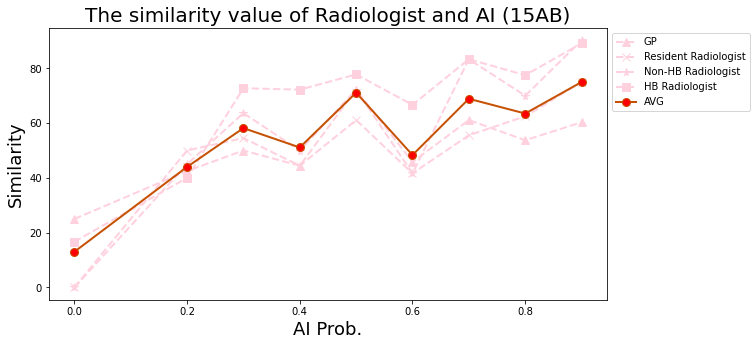

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))

y = [13.00,44.00,58.18,51.11,71.11,48.33,68.89,63.50,75.00]
x = [0,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.plot(x, GP, color='#ffd1df', linestyle='--', linewidth = 2, marker='^', markerfacecolor='#ffd1df', markersize=8)
plt.plot(x, RES, color='#ffd1df', linestyle='--', linewidth = 2, marker='x', markerfacecolor='#ffd1df', markersize=8)
plt.plot(x, NONHB, color='#ffd1df', linestyle='--', linewidth = 2, marker='*', markerfacecolor='#ffd1df', markersize=8)
plt.plot(x, HB, color='#ffd1df', linestyle='--', linewidth = 2, marker='s', markerfacecolor='#ffd1df', markersize=8)
plt.plot(x, y, color='#c65102', linestyle='-', linewidth = 2, marker='o', markerfacecolor='r', markersize=8)

legend(['GP', 'Resident Radiologist','Non-HB Radiologist','HB Radiologist','AVG'], bbox_to_anchor=(1.,1.))
# plt.title('The similarity value of Radiologist and AI (Abn&Nor)',fontsize=20) 
plt.title('The similarity value of Radiologist and AI (15AB)',fontsize=20) 
plt.xlabel('AI Prob.',fontsize=18)
plt.ylabel('Similarity',fontsize=18)
show()

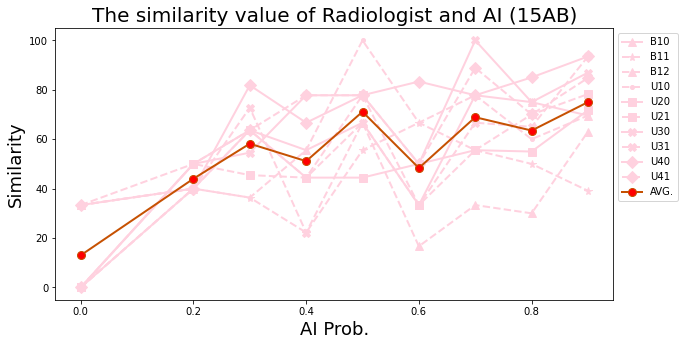

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))

y = [13.00,44.00,58.18,51.11,71.11,48.33,68.89,63.50,75.00]
x = [0,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.plot(x, y10, color='#ffd1df', linestyle='-', linewidth = 2, marker='^', markerfacecolor='#ffd1df', markersize=8)
plt.plot(x, y11, color='#ffd1df', linestyle='--', linewidth = 2, marker='*', markerfacecolor='#ffd1df', markersize=8)
plt.plot(x, y12, color='#ffd1df', linestyle='--', linewidth = 2, marker='^', markerfacecolor='#ffd1df', markersize=8)
plt.plot(x, y13, color='#ffd1df', linestyle='--', linewidth = 2, marker='.', markerfacecolor='#ffd1df', markersize=8)
plt.plot(x, y20, color='#ffd1df', linestyle='-', linewidth = 2, marker='s', markerfacecolor='#ffd1df', markersize=8)
plt.plot(x, y21, color='#ffd1df', linestyle='--', linewidth = 2, marker='s', markerfacecolor='#ffd1df', markersize=8)
plt.plot(x, y30, color='#ffd1df', linestyle='-', linewidth = 2, marker='X', markerfacecolor='#ffd1df', markersize=8)
plt.plot(x, y31, color='#ffd1df', linestyle='--', linewidth = 2, marker='X', markerfacecolor='#ffd1df', markersize=8)
plt.plot(x, y40, color='#ffd1df', linestyle='-', linewidth = 2, marker='D', markerfacecolor='#ffd1df', markersize=8)
plt.plot(x, y41, color='#ffd1df', linestyle='--', linewidth = 2, marker='D', markerfacecolor='#ffd1df', markersize=8)

plt.plot(x, y, color='#c65102', linestyle='-', linewidth = 2, marker='o', markerfacecolor='r', markersize=8)

legend(['B10','B11','B12','U10','U20','U21','U30','U31','U40','U41','AVG.'], bbox_to_anchor=(1.,1.))
# plt.title('The similarity value of Radiologist and AI (Abn&Nor)',fontsize=20) 
plt.title('The similarity value of Radiologist and AI (15AB)',fontsize=20) 
plt.xlabel('AI Prob.',fontsize=18)
plt.ylabel('Similarity',fontsize=18)
show()